![example](images/director_shot.jpeg)

# Project Title

**Authors:** Gajanani Sanchayan
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('kc_house_data.csv', index_col=0)


In [3]:
# Here you run your code to explore the data
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


data.describe()


In [ ]:
data.info()

In [ ]:
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [6]:
#drop un necessary variables

data = data.drop(['date', 'zipcode', 'lat','long','sqft_living15','sqft_lot15','view','yr_built','yr_renovated'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

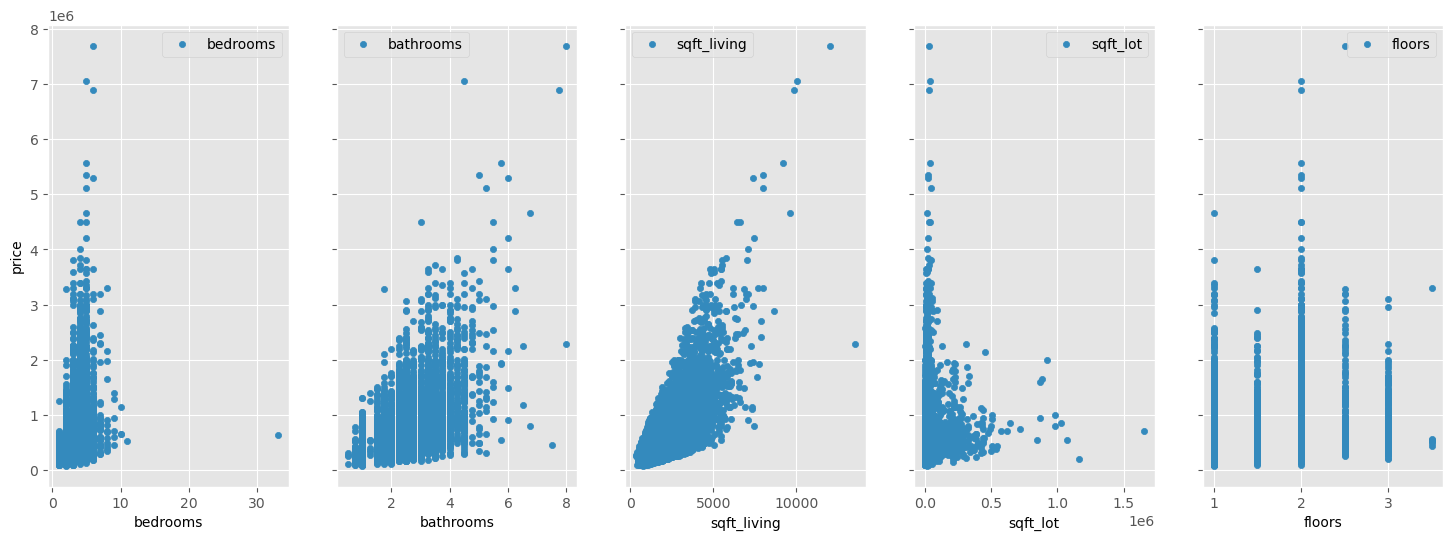

In [5]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

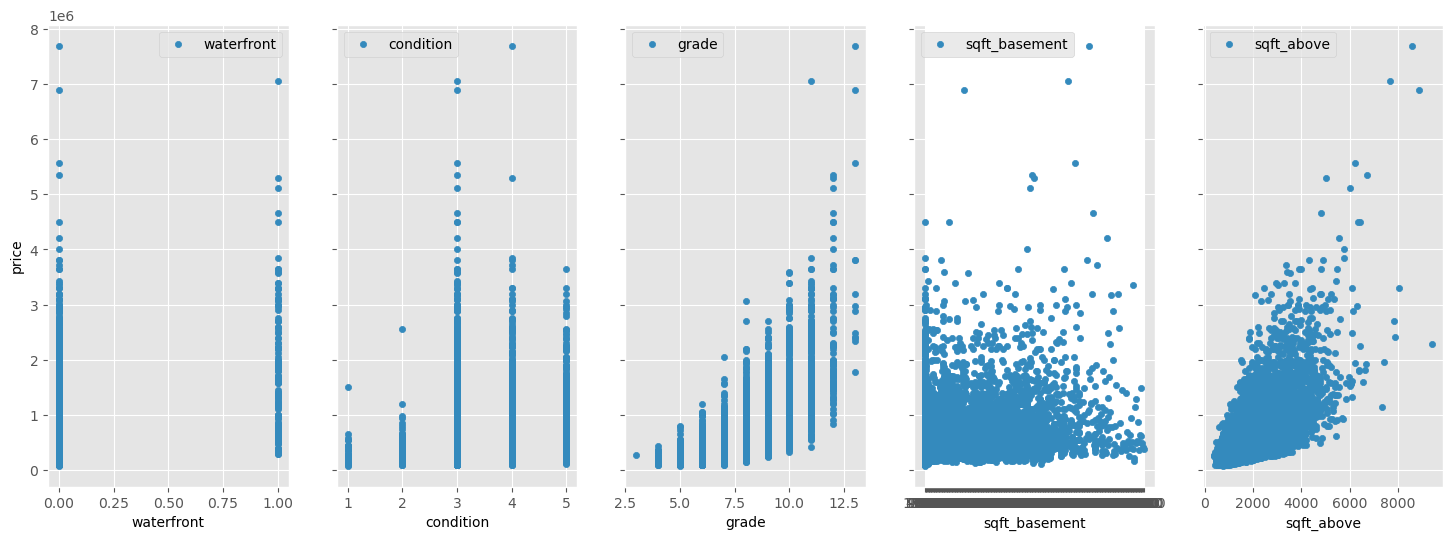

In [4]:
# Here you run your code to clean the data
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['waterfront','condition','grade','sqft_basement','sqft_above']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()


## Baseline Model

***

In [8]:
from statsmodels.formula.api import ols

In [9]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'condition','grade','sqft_basement','waterfront','sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:34:50   Log-Likelihood:            -2.6400e+05
No. Observations:               19221   AIC:                         5.286e+05
Df Residuals:                   18912   BIC:                         5.310e+05
Df Model:                         308                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -7.6e+05   1.82e+04    -41.730      0.000   -7.96e+05   -7.24e+05
sqft_basement[T.10.0]   -3.428e+04   2.25e+05     -0.152      0.879   -4.75e+05    4.07e+05
sqft_basement[T.100.0]   1.505e+05   3.67e+04      4.102      0.000    7.86e+04    2.22e+05
sqft_basement[T.1000.0]  5.768e+04   3.18e+04      1.815      0.070   -4618.836     1.2e+05
sqft_basement[T.1008.0] -2.164e+05   2.26e+05     -0.956      0.339    -6.6e+05    2.27e+05
sqft_basement[T.1010.0]  5.325e+04   3.88e+04      1.374      0.170   -2.27e+04    1.29e+05
sqft_basement[T.1020.0]  1.277e+05   4.19e+04      3.052      0.002    4.57e+04     2.1e+05
sqft_basement[T.1024.0] -6.728e+05   2.26e+05     -2.971      0.003   -1.12e+06   -2.29e+05
sqft_basement[T.1030.0]  1.623e+05    4.3e+04      3.778      0.000    7.81e+04    2.46e+05
sqft_basement[T.1040.0]  1.061e+04   4.13e+04      0.257      0.797   -7.04e+04    9.16e+04
sqft_basement[T.1050.0]  9.035e+04   4.55e+04      1.986      0.047    1166.388     1.8e+05
sqft_basement[T.1060.0]  1.912e+04   4.04e+04      0.473      0.636      -6e+04    9.83e+04
sqft_basement[T.1070.0] -7411.1288   4.39e+04     -0.169      0.866   -9.34e+04    7.85e+04
sqft_basement[T.1080.0]  4.421e+04   5.01e+04      0.882      0.378    -5.4e+04    1.42e+05
sqft_basement[T.1090.0]  5.928e+04    4.9e+04      1.209      0.227   -3.68e+04    1.55e+05
sqft_basement[T.110.0]   7.789e+04   5.82e+04      1.337      0.181   -3.63e+04    1.92e+05
sqft_basement[T.1100.0]  5.799e+04   3.85e+04      1.506      0.132   -1.75e+04    1.33e+05
sqft_basement[T.1110.0]  9.537e+04   4.82e+04      1.979      0.048     905.190     1.9e+05
sqft_basement[T.1120.0]  1.003e+05   4.53e+04      2.214      0.027    1.15e+04    1.89e+05
sqft_basement[T.1130.0]  3.528e+04   5.36e+04      0.658      0.511   -6.99e+04     1.4e+05
sqft_basement[T.1135.0] -1.985e+04   2.27e+05     -0.088      0.930   -4.64e+05    4.25e+05
sqft_basement[T.1140.0]  1.191e+05    5.3e+04      2.248      0.025    1.53e+04    2.23e+05
sqft_basement[T.1150.0]  7765.7749   5.66e+04      0.137      0.891   -1.03e+05    1.19e+05
sqft_basement[T.1160.0] -5.447e+04    5.4e+04     -1.008      0.313    -1.6e+05    5.14e+04
sqft_basement[T.1170.0] -3.301e+04   5.42e+04     -0.610      0.542   -1.39e+05    7.31e+04
sqft_basement[T.1180.0]  3.221e+04   5.43e+04      0.593      0.553   -7.42e+04    1.39e+05
sqft_basement[T.1190.0] -1.799e+04   5.53e+04     -0.325      0.745   -1.26e+05    9.04e+04
sqft_basement[T.120.0]    1.56e+05   3.31e+04      4.720      0.000    9.12e+04    2.21e+05
sqft_basement[T.1200.0]  4.561e+04   4.07e+04      1.121      0.262   -3.42e+04    1.25e+05
sqft_basement[T.1210.0] -8.273e+04   6.08e+04     -1.361      0.173   -2.02e+05    3.64e+04
sqft_basement[T.1220.0]  6.161e+04   5.26e+04  

In [12]:
#Overall q-q plot of the model
res = model.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()


NameError: name 'sm' is not defined

In [ ]:
##LINEAR ASSUMPTIOMS

In [11]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


NameError: name 'sm' is not defined

<Figure size 1500x800 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


eval_env: 1


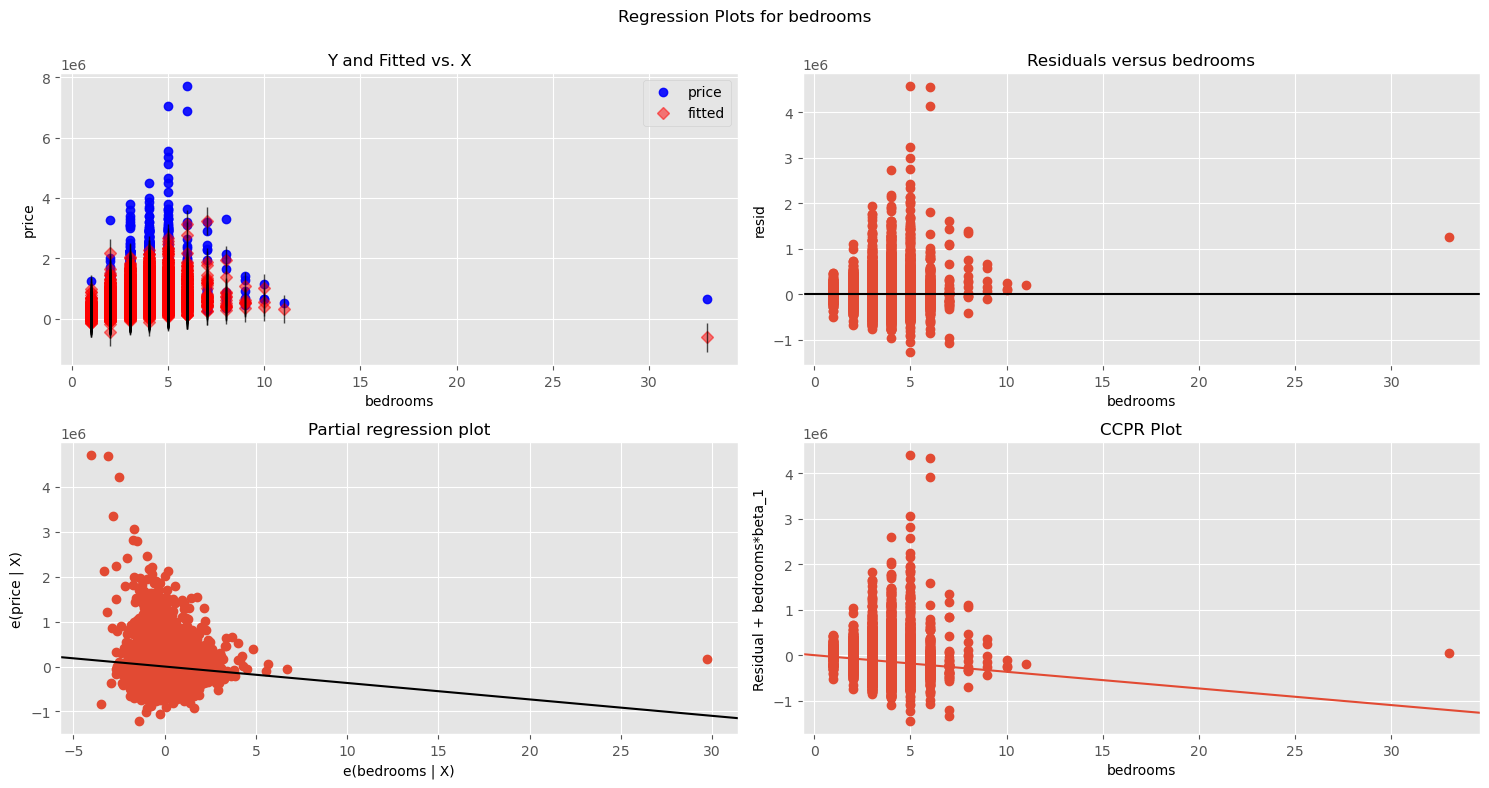

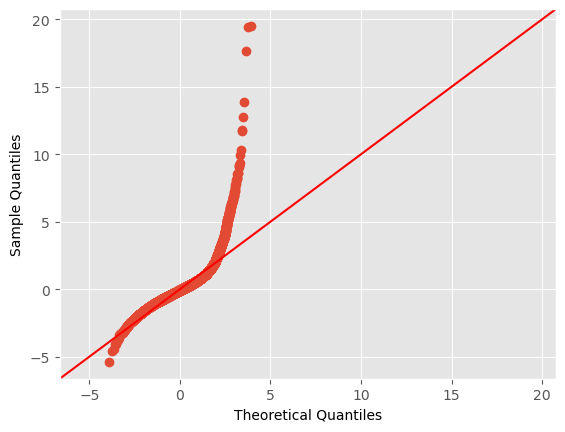

In [58]:


fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


eval_env: 1


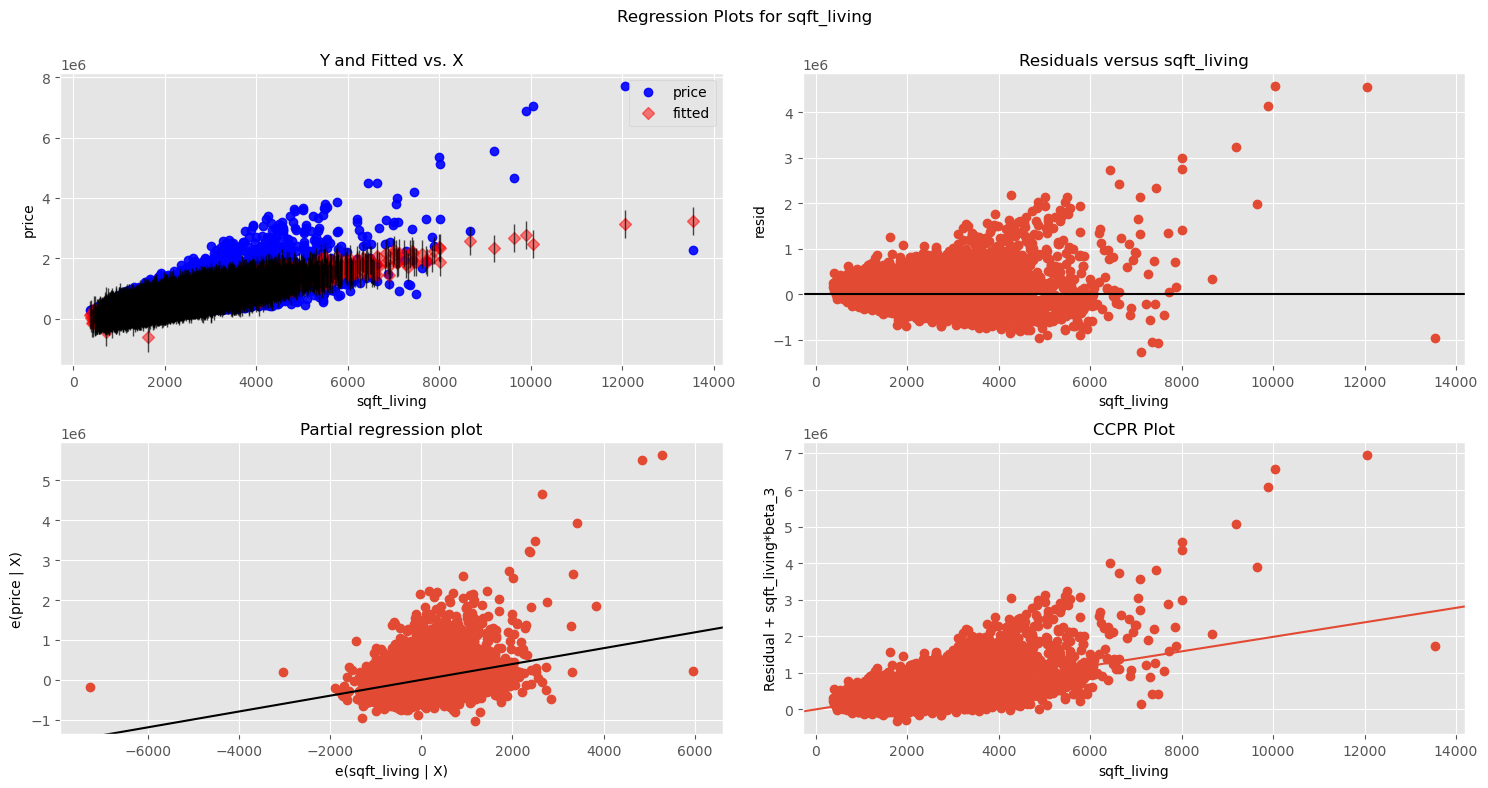

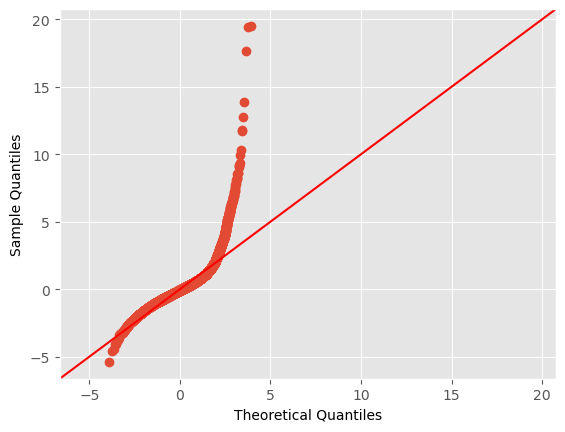

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


In [191]:
Record

drop floors

In [ ]:
## Baseline Model

In [ ]:
#REMOVING OUTLIERS
z_scores = np.abs((data - data.mean()) / data.std())
z_score_threshold = 3

outlier_mask = (z_scores <= z_score_threshold).all(axis=1)
filtered_data = data[outlier_mask]
X_filtered = filtered_data.drop('price', axis=1)
y_filtered = filtered_data['price']

In [227]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17666 entries, 6414100192 to 1523300157
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17666 non-null  float64
 1   bedrooms       17666 non-null  int64  
 2   bathrooms      17666 non-null  float64
 3   sqft_living    17666 non-null  int64  
 4   sqft_lot       17666 non-null  int64  
 5   floors         17666 non-null  float64
 6   waterfront     17666 non-null  float64
 7   condition      17666 non-null  int64  
 8   grade          17666 non-null  int64  
 9   sqft_above     17666 non-null  int64  
 10  sqft_basement  17666 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 1.6 MB


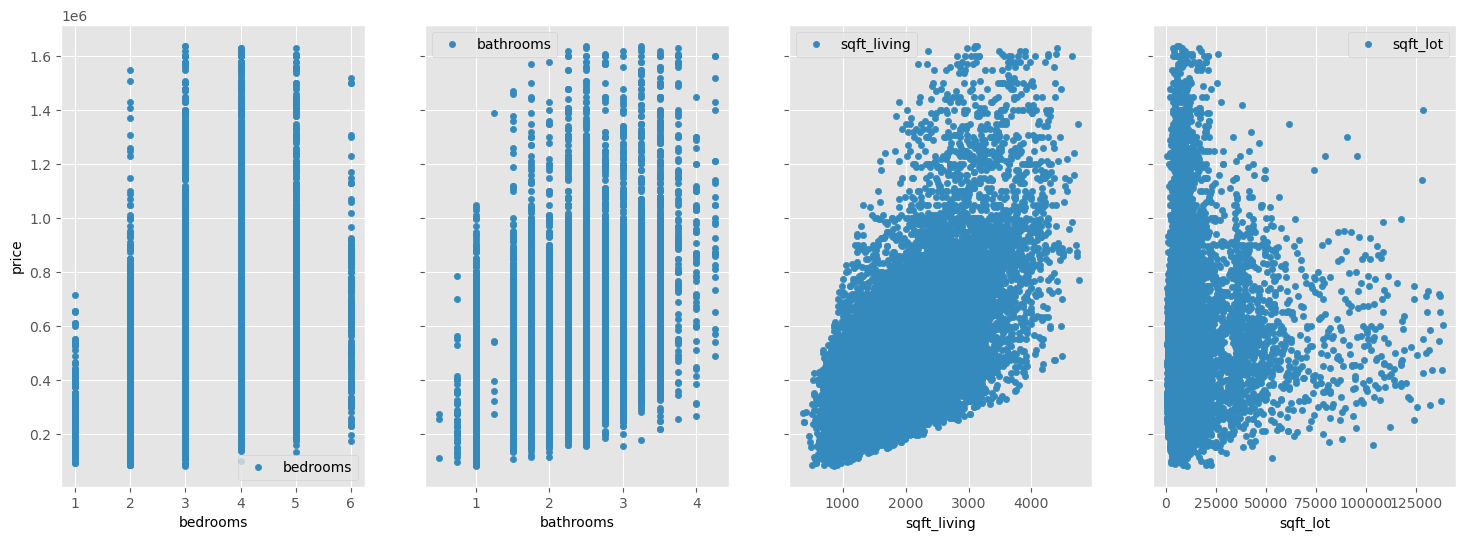

In [198]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living','sqft_lot']):
    filtered_data .plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

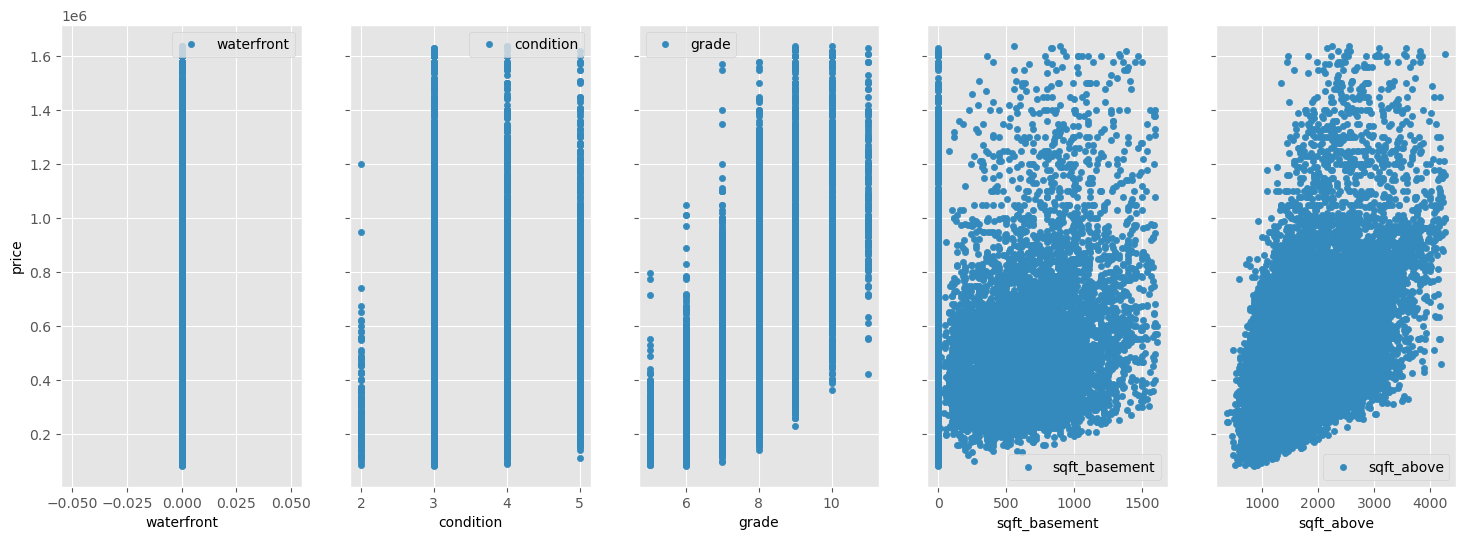

In [189]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['waterfront','condition','grade','sqft_basement','sqft_above']):
    filtered_data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [ ]:
#Create Dummies for Categorical data
continuous = ['sqft_living','sqft_lot','sqft_basement','sqft_above']
categoricals = ['bedrooms', 'bathrooms','waterfront','condition','grade']

Filtered_data = pd.get_dummies(filtered_data, columns=categoricals, prefix=categoricals,drop_first=True)

In [ ]:
Filtered_data.head() 

In [314]:
Filtered_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17666 entries, 6414100192 to 1523300157
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           17666 non-null  float64
 1   sqft_living     17666 non-null  int64  
 2   sqft_lot        17666 non-null  int64  
 3   floors          17666 non-null  float64
 4   sqft_above      17666 non-null  int64  
 5   sqft_basement   17666 non-null  float64
 6   bedrooms_2      17666 non-null  uint8  
 7   bedrooms_3      17666 non-null  uint8  
 8   bedrooms_4      17666 non-null  uint8  
 9   bedrooms_5      17666 non-null  uint8  
 10  bedrooms_6      17666 non-null  uint8  
 11  bathrooms_0.75  17666 non-null  uint8  
 12  bathrooms_1.0   17666 non-null  uint8  
 13  bathrooms_1.25  17666 non-null  uint8  
 14  bathrooms_1.5   17666 non-null  uint8  
 15  bathrooms_1.75  17666 non-null  uint8  
 16  bathrooms_2.0   17666 non-null  uint8  
 17  bathrooms_2.25  1

In [ ]:

#Dummy variable
Filtered_data['Bed2_3']= Filtered_data['bedrooms_2'] + Filtered_data['bedrooms_3']
Filtered_data['Bed4_6']= Filtered_data['bedrooms_4'] + Filtered_data['bedrooms_5'] +Filtered_data['bedrooms_6']
Filtered_data['bath1_2']= Filtered_data['bathrooms_0.75'] + Filtered_data['bathrooms_1.0'] +Filtered_data['bathrooms_1.25']+Filtered_data['bathrooms_1.5']+Filtered_data['bathrooms_1.75']+Filtered_data['bathrooms_2.0']
Filtered_data['bath2_5']= Filtered_data['bathrooms_2.25'] + Filtered_data['bathrooms_2.5'] +Filtered_data['bathrooms_2.75']+Filtered_data['bathrooms_3.0']+Filtered_data['bathrooms_3.25']+Filtered_data['bathrooms_3.5']+Filtered_data['bathrooms_3.75']+Filtered_data['bathrooms_4.0']+Filtered_data['bathrooms_4.25']
New_data = Filtered_data.drop(['bedrooms_2', 'bedrooms_3','bedrooms_4','bedrooms_5','bedrooms_6','bathrooms_0.75','bathrooms_1.0','bathrooms_1.25','bathrooms_1.5','bathrooms_1.75','bathrooms_2.0','bathrooms_2.25','bathrooms_2.5','bathrooms_2.75','bathrooms_3.0','bathrooms_3.25','bathrooms_3.5','bathrooms_3.75','bathrooms_4.0','bathrooms_4.25'], axis=1)


In [ ]:
New_data .info()


In [ ]:
New_data.describe()

# multicollinearity

pd.plotting.scatter_matrix(New_data,figsize  = [9, 9]);
plt.show()


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***